In [15]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def load_df():
    df_paths = [name for name in glob.glob('Sources/*')]
    lst = []
    for df in df_paths:
        data = pd.read_csv(df)
        lst.append(data)
    return pd.concat(lst)

In [17]:
df = load_df()
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [18]:
df_size = df.size
print(df_size)

18137308


In [19]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [20]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [21]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [22]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4534327 entries, 0 to 1028135
Columns: 4 entries, Date/Time to Base
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [23]:
df.shape

(4534327, 4)

In [24]:
uber_df = df

In [25]:
uber_df['BinnedHour'] = uber_df['Date/Time'].dt.floor('10min')

In [26]:
uber_df['BinnedHour']

0         2014-04-01 00:10:00
1         2014-04-01 00:10:00
2         2014-04-01 00:20:00
3         2014-04-01 00:20:00
4         2014-04-01 00:30:00
                  ...        
1028131   2014-09-30 22:50:00
1028132   2014-09-30 22:50:00
1028133   2014-09-30 22:50:00
1028134   2014-09-30 22:50:00
1028135   2014-09-30 22:50:00
Name: BinnedHour, Length: 4534327, dtype: datetime64[ns]

In [27]:
uber_df['day']=uber_df['Date/Time'].dt.day
uber_df['month']=uber_df['Date/Time'].dt.month
uber_df['hour']=uber_df['Date/Time'].dt.hour

In [28]:
uber_df.head(200) 

,Date/Time,Lat,Lon,Base,BinnedHour,day,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01 00:10:00,1,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:10:00,1,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:20:00,1,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01 00:20:00,1,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01 00:30:00,1,4,0
...,...,...,...,...,...,...,...,...
195,2014-04-01 08:39:00,40.7889,-73.9542,B02512,2014-04-01 08:30:00,1,4,8
196,2014-04-01 08:42:00,40.7835,-73.9513,B02512,2014-04-01 08:40:00,1,4,8
197,2014-04-01 08:43:00,40.7651,-73.9617,B02512,2014-04-01 08:40:00,1,4,8
198,2014-04-01 08:43:00,40.7261,-73.9918,B02512,2014-04-01 08:40:00,1,4,8


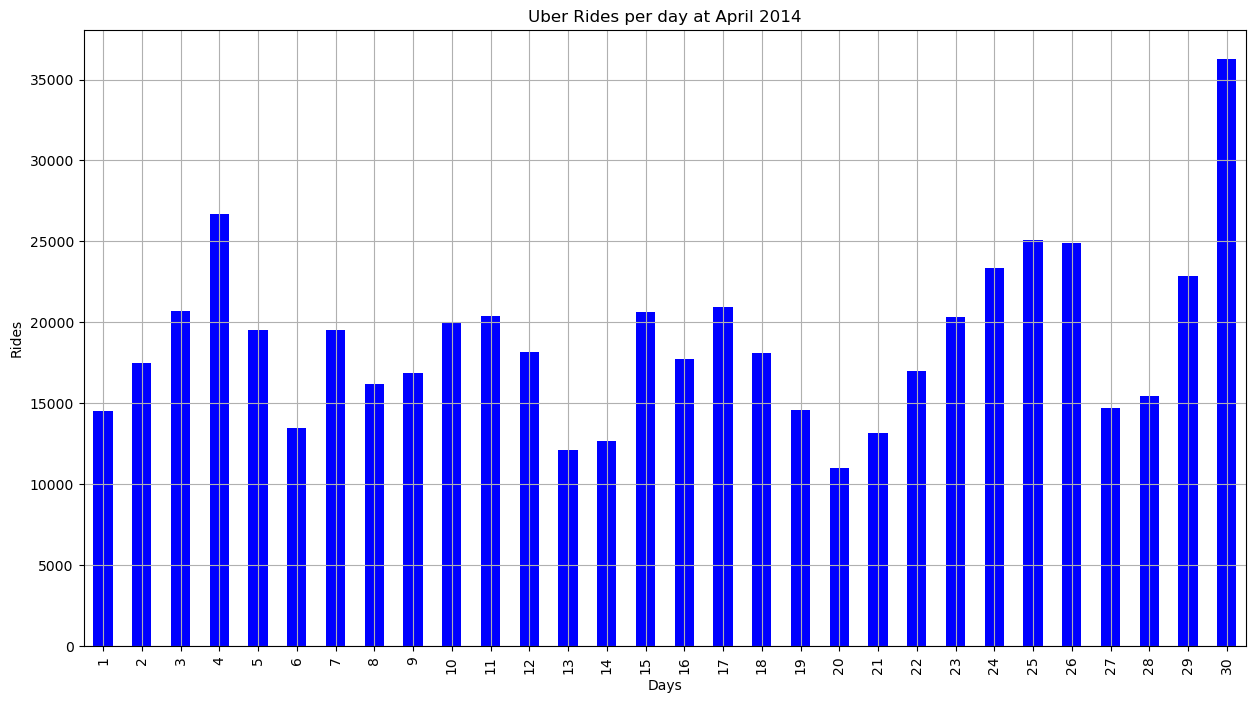

In [29]:
plt.figure(figsize=(15,8))
uber_df_abr = uber_df[uber_df['month']==4]
uber_df_abr['day'].value_counts().sort_index().plot(kind='bar',color='blue')

index = uber_df.loc[:,'day'].unique()

plt.title('Uber Rides per day at April 2014')
plt.xlabel('Days')
plt.ylabel('Rides')
plt.grid(True)
plt.show()

In [34]:
df_aux = df['month'].value_counts().sort_index()

In [35]:
print(df_aux)

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: count, dtype: int64


<Axes: xlabel='month'>

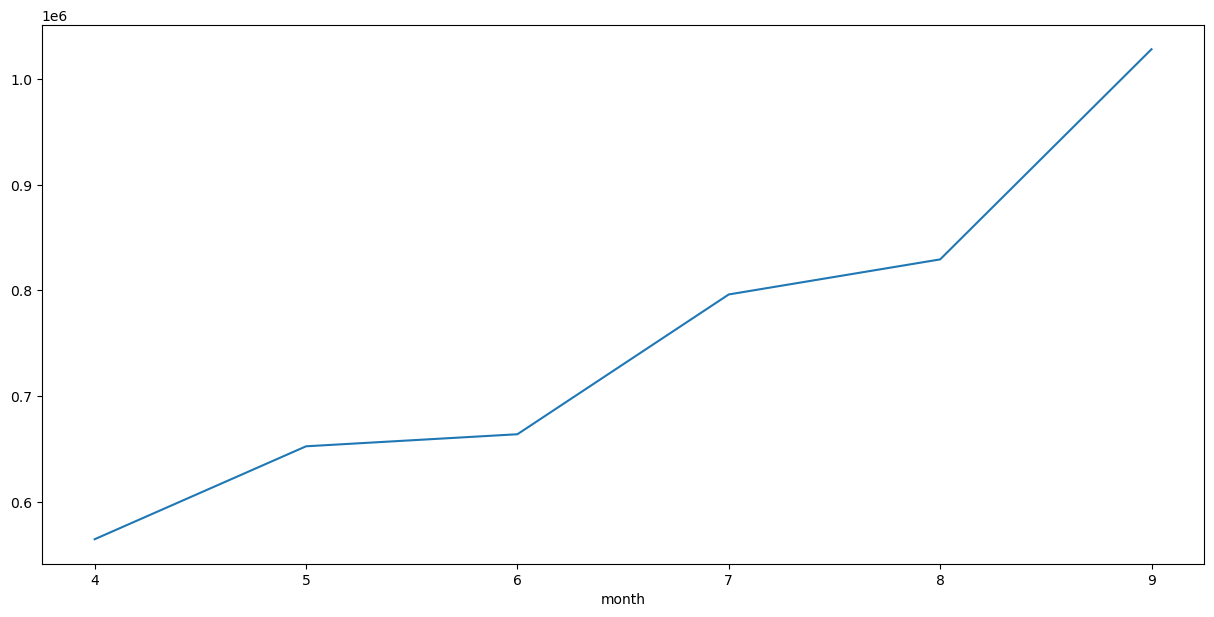

In [37]:
df_aux.plot(figsize=(15,7))

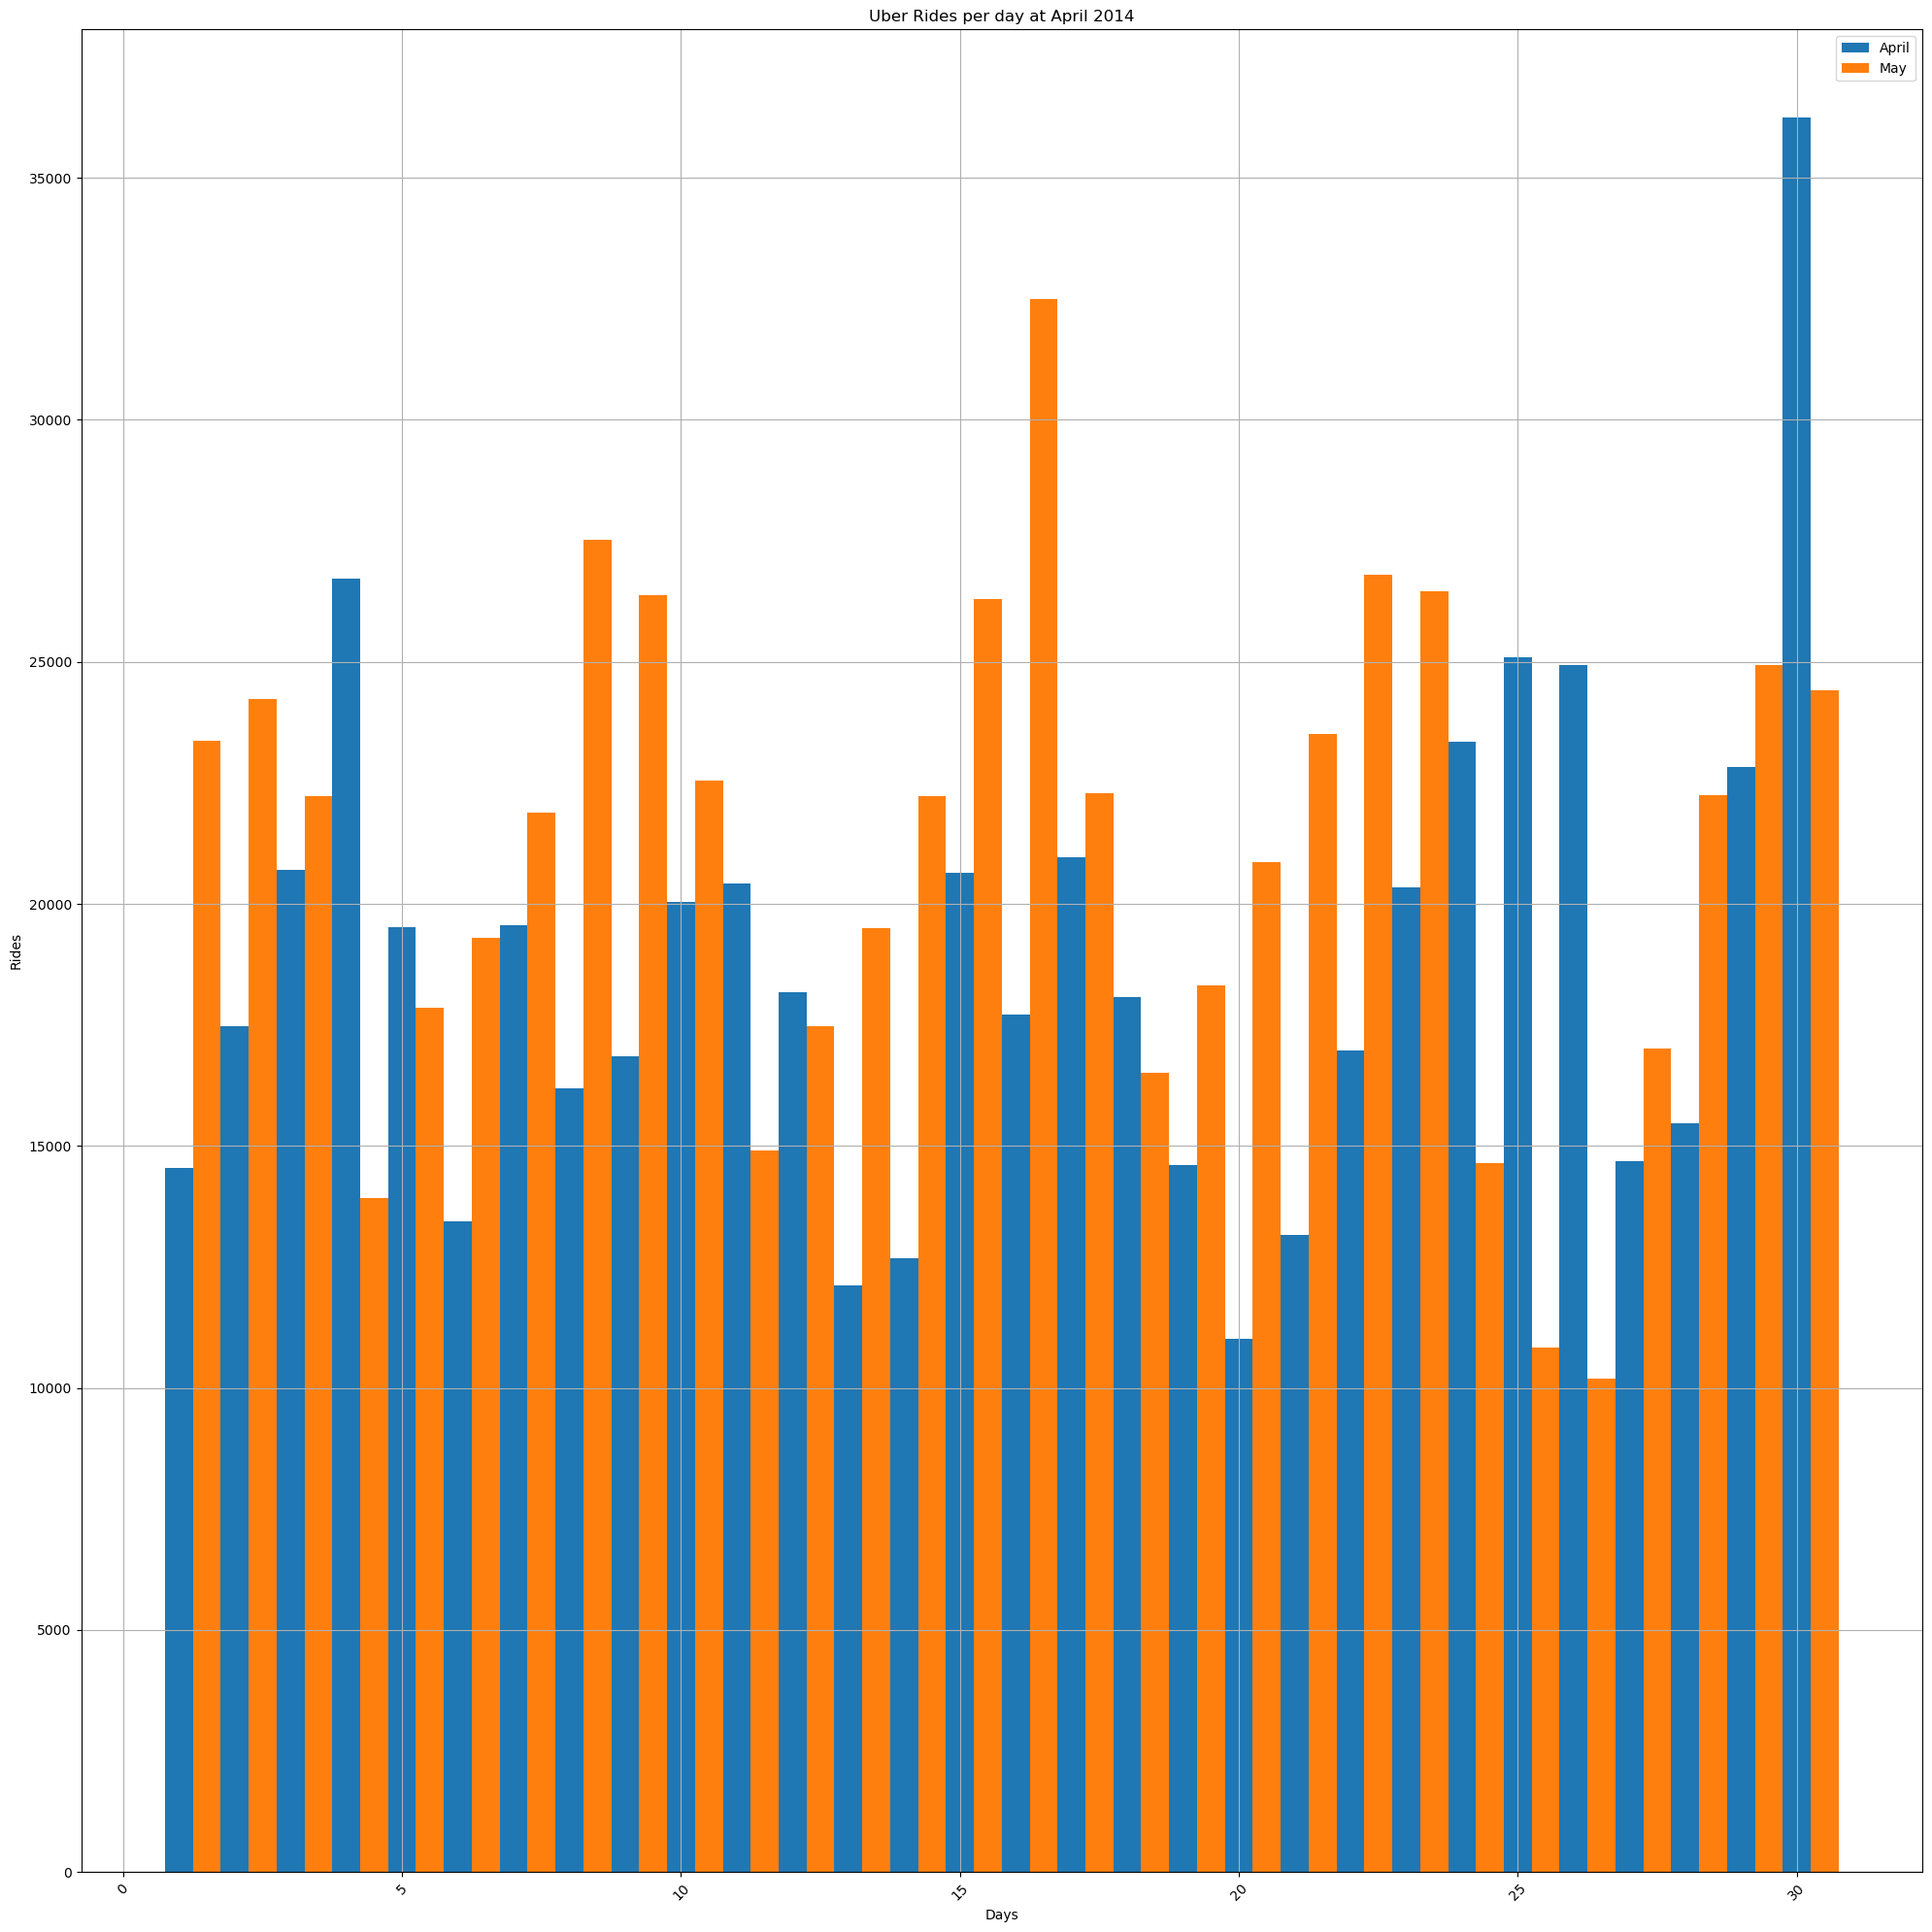

In [56]:
uber_df_abr = uber_df[uber_df['month']==4]
uber_df_may = uber_df[uber_df['month']==5]
uber_df_jun = uber_df[uber_df['month']==6]
uber_df_jul = uber_df[uber_df['month']==7]
uber_df_aug = uber_df[uber_df['month']==8]
uber_df_sep = uber_df[uber_df['month']==9]

bar_width = 0.5

# Find common dates between the two months
index = np.arange(1,31)

# Filter dataframes to include only common dates
uber_df_abr_filtered = uber_df_abr[uber_df_abr['day'].isin(index)]
uber_df_may_filtered = uber_df_may[uber_df_may['day'].isin(index)]

fig, ax = plt.subplots(layout='constrained')

abr = ax.bar(index, uber_df_abr_filtered["day"].value_counts().sort_index(), bar_width,
                label="April")

may = ax.bar(index+bar_width, uber_df_may_filtered["day"].value_counts().sort_index(),
                bar_width, label="May")

plt.title('Uber Rides per day at April 2014')
plt.xlabel('Days')
plt.ylabel('Rides')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

In [60]:
np.random.randn(200, 3)

array([[ 7.26205313e-01, -9.87280047e-02, -6.58945809e-01],
       [ 4.71088156e-02, -5.20002018e-01, -2.73280514e-01],
       [-1.21826957e-01, -6.90126427e-03,  7.51661580e-01],
       [ 1.44345647e-03, -2.03086225e+00,  7.36933807e-02],
       [-1.23137983e+00, -1.65991652e+00, -9.65454464e-01],
       [ 1.35830555e-01, -1.00572658e+00,  7.08456789e-01],
       [ 7.13378572e-02,  9.41185177e-01,  1.80950221e+00],
       [ 6.04803367e-01,  1.19089891e+00,  5.96098562e-01],
       [ 7.47023460e-01, -2.11540863e+00,  1.94907341e+00],
       [-1.60153945e+00, -2.97335708e-01, -3.34691663e-01],
       [ 1.37085091e+00, -3.70696153e-01,  8.45816058e-01],
       [-4.83972156e-01, -1.47306967e+00,  7.27864991e-01],
       [-1.01588894e+00, -4.77742009e-01,  7.79695415e-01],
       [-8.40611640e-01, -4.47247076e-01,  1.35392533e+00],
       [ 1.72685734e+00, -1.31213393e+00,  2.46476437e+00],
       [ 8.92003083e-01,  2.21457109e+00,  6.10747962e-01],
       [-7.04541679e-01,  5.25015873e-01

In [1]:
from datetime import time
time(11,30) 

datetime.time(11, 30)

In [21]:
index = np.sort(uber_df.loc[:,'month'].unique())
print(index)
print(type(index))

[4 5 6 7 8 9]
<class 'numpy.ndarray'>


In [28]:
df['month'].value_counts().sort_index().reset_index(name='Sum of Rides per month')

,month,Sum of Rides per month
0,4,564516
1,5,652435
2,6,663844
3,7,796121
4,8,829275
5,9,1028136


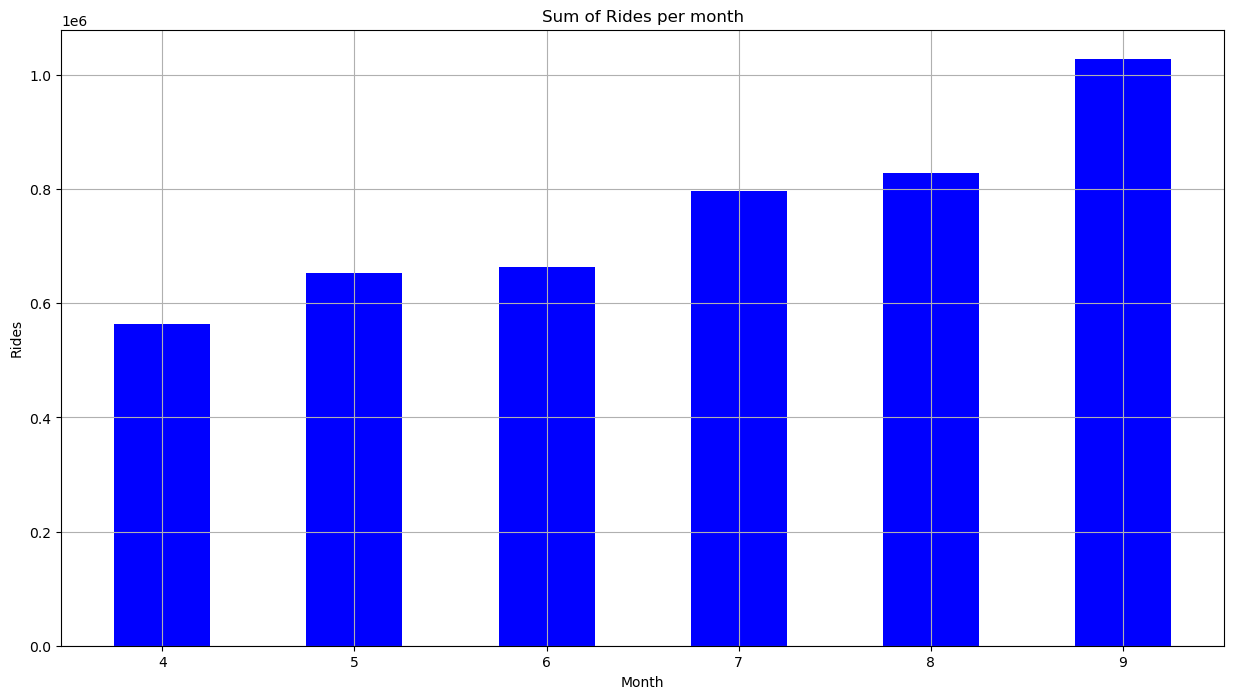

In [29]:
df_agg_month = df['month'].value_counts().sort_index().reset_index(name='Sum of Rides per month')

plt.figure(figsize=(15,8))

plt.bar(df_agg_month['month'], df_agg_month['Agg Rides per month'], color='blue', width=0.5)
plt.title('Sum of Rides per month')
plt.xlabel('Month')
plt.ylabel('Rides')
plt.grid(True)
plt.show()

Esta es attributeBill Depth
Esta es measurement(18.35, 18.43, 14.98)
Esta es attributeBill Length
Esta es measurement(38.79, 48.83, 47.5)
Esta es attributeFlipper Length
Esta es measurement(189.95, 195.82, 217.19)


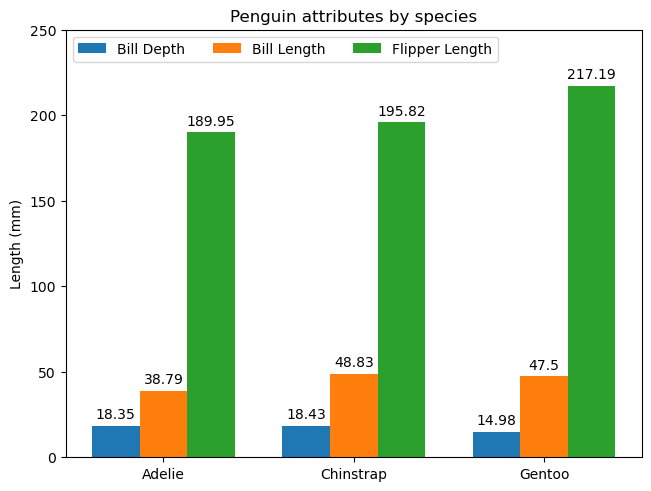

In [22]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    print(f'Esta es attribute{attribute}')
    print(f'Esta es measurement{measurement}')
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

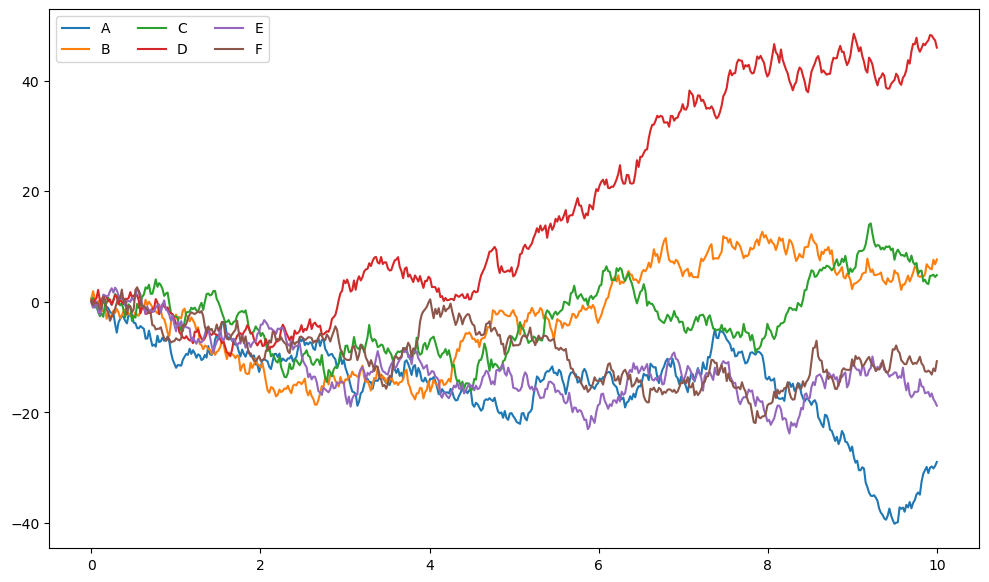

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), axis = 0)

plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=3, loc='upper left')

In [13]:
print(y)

[[  0.43120623   0.6951444   -0.76270266   0.36487219  -1.18275271
   -1.49061297]
 [ -0.92660273   0.71439309  -2.11919462  -0.39019336  -0.3947839
   -1.4045961 ]
 [ -0.59276724   0.79691931  -0.98902949  -0.49906367  -0.53471125
   -4.51254805]
 ...
 [ -9.32969189  21.2833411  -13.84957653 -39.71178511  -8.90304464
    1.65393455]
 [ -9.02912558  20.9364398  -15.09756367 -40.02096905 -10.41511937
    2.45464113]
 [ -7.76962385  21.00947007 -15.89478066 -40.18456752 -12.91246636
    2.11794167]]


In [7]:
z = np.cumsum(np.random.randn(500, 6))

In [9]:
print(z)

[-0.36386267 -0.15444078  0.05154725 ...  2.55614533  4.51045525
  3.13697186]


In [11]:
print(x.size)

500
